In [1]:
pwd

'C:\\Users\\Owner'

In [2]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))

5574


In [5]:
#Due to spacing, we can tell this is a tab seperated file (TSV)
#What's going on?
#Number is num from enumerate
#Ham or Spam = First collumn.
#Second part is message itself.

for num, messages in enumerate(messages[:10]):
    print(num,messages)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [6]:
#Let's use Pandas to use/operate this file..
import pandas as pd

In [7]:
messages = pd.read_csv('SMSSpamCollection',
                       sep='\t',names=['labels','message'])

In [8]:
messages.head()

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
#What are we dealing with..
#Sorry, I'll call later is very popular.
messages.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
#Well, this wasn't useful. d'oh.
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [11]:
#Should read more about Feature Engineering*
messages.groupby('labels').describe()

message                                                               
         count unique                                                top freq
labels                                                                       
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [12]:
#Let's try to get features from the data
#No parenthesis after len because we want to apply method not call it.
messages['length'] = messages['message'].apply(len)
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

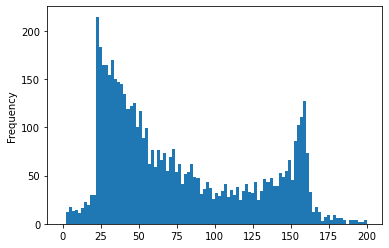

In [30]:
#Let's make a hitogram of the length of the messages
#Using visualization skills to analyze data, set range to 0,200 for readability
#NOTE: There are still a good number of values outside of 200
messages['length'].plot(bins=100,kind='hist',range=(0,200))

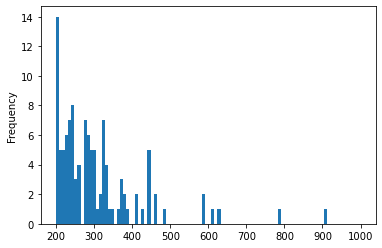

In [31]:
#Some of the longer messages with much lower frequency.
messages['length'].plot(bins=100,kind='hist',range=(200,1000))

In [32]:
#Max 910 characters. lolwtf.
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [34]:
messages[messages['length']==910]

,labels,message,length
1085,ham,For me the love should start with attraction.i...,910


In [35]:
#Using masking, I'll grab that message. iloc[0] to print
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A83945C4C8>,
      dtype=object)

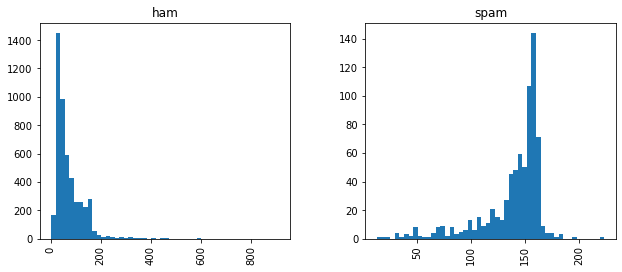

In [36]:
#Seperate ham & spam data into two charts.
#Less spam on the lower end msgs. 
messages.hist(column='length',by='labels',bins=50,figsize=(10,4))

In [37]:
#Classification algo need numerical feature vector to perform classific task.
#Bag-of-words method, assign words a number.
#Part 3

In [38]:
import string

In [39]:
#Process a string in the message column
#Seq of characters = Seq of numbers..

mess = 'Sample message! Notice: it has punctuation!'

In [40]:
#Let's get rid of the sample punctuation.
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
nopunc = [char for char in mess if char not in string.punctuation]

In [43]:
nopunc = ''.join(nopunc)

In [44]:
#Yay, no longer has punctuation.
nopunc

'Sample message Notice it has punctuation'

In [45]:
from nltk.corpus import stopwords

In [46]:
#Let's look at some stopwords.
#Things we want to remove, because they're so common that they don't give much
#information
stopwords.words('english')[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [47]:
#Split as list
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [48]:
#Remove stop words.
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [49]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [50]:
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    
    #Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]
    
    #Join the characters again to form the string
    nopunc = ''.join(nopunc)
    
    #Now remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [51]:
#We'll need to tokenize this.. turn word strings into tokens--
messages.head()

,labels,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [52]:
#This is what our output will look like later on
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

In [53]:
#Continuing Normalization
#Text Normalization methods have trouble with AAVE & shorthand
#Nah dawg, idk! wut time u headin to da club!?
#vs
#No dog, I don't know! What time are you heading to the club?
#Should checkout Stemming and Part of Speech* NLTK book online.

#Stemming may take traveling and realize it's related to travel
#'traveling'
#'travel'

In [55]:
#---------------VECTORIZATION----------------------
#1) Count how many times a word occurs in a message (((Term Frequency)))
#2) Weigh the counts, so that frequent tokens get lower weight (Inv Doc Freq)
#3) Normalize the vectors to unit length, to abstract from orig text length (L2)

In [56]:
#SciKitLearn CountVectorizer
#Sparse Matrix

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
#Analyzer Argument

bow_transformer = CountVectorizer(analyzer=text_process)

In [59]:
#Fit model to messages

bow_transformer.fit(messages['message'])

CountVectorizer(analyzer=<function text_process at 0x000001A83FDE9EE8>)

In [60]:
message4 = messages['message'][3]

In [61]:
print(message4)

U dun say so early hor... U c already then say...


In [62]:
bow4 = bow_transformer.transform([message4])

In [63]:
bow4

<1x11425 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [64]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [67]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [68]:
messages_bow = bow_transformer.transform(messages['message'])

In [78]:
print('Shape of Sparse Matrix: ', messages_bow.shape)
print('Amount of Non-Zero occurences: ', messages_bow.nnz)

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548


In [79]:
#TF: Term Frequency = How frequently a term occurs in a document
    #Longer documents have higher TF than shorter docs
        #Thus, TF is oft div by doc len
    #TF(t) = (NumTAppears) / (Tot Num of Terms in Doc)
#IDF: Inverse Document Frequency = How important a term is.
    #While computing TF, all terms are equally important
    #However, words like "is", "of", and "that" are less important
        #Thus we must weigh down freq terms and scale up rare ones
            #IDF(t)=log_e(TotalNumOfDoc / Num of Docs w Term T in it)

#Example: Consider a document containing 100 words wherein the word CAT
#appears 3 times.
#TF = (3/100) = 0.03

#Now, assume we have the word CAT and 10,000,000 documents
#And CAT appears in 1,000 of these. Then the IDF is calc'd as
# log(10,000,000 / 1,000) = 4.
#Thus, the Tf-idf weight is the product of these quantities
#0.03 * 4 = 0.12

In [81]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [83]:
tfidf4 = tfidf_transformer.transform(bow4)

In [84]:
tfidf4

<1x11425 sparse matrix of type '<class 'numpy.float64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [85]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [86]:
#What's the TfIDF of 'u'?

print(tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])

3.2800524267409408


In [87]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [88]:
print(messages_tfidf)

  (0, 11163)	0.23026685592418913
  (0, 10965)	0.19073428545061483
  (0, 8917)	0.24704652376837993
  (0, 8336)	0.17046869292195632
  (0, 7668)	0.26403384065473806
  (0, 7555)	0.31253856260694546
  (0, 6937)	0.1834692413608692
  (0, 6906)	0.15158474664662352
  (0, 6217)	0.18915557732842803
  (0, 5769)	0.24984711892976424
  (0, 5218)	0.26870593862526665
  (0, 5217)	0.29835184088197164
  (0, 4653)	0.31253856260694546
  (0, 2060)	0.24203960256420656
  (0, 1483)	0.31253856260694546
  (0, 1110)	0.2882862016308418
  (1, 11072)	0.40061560982443056
  (1, 10698)	0.2063637481323008
  (1, 8590)	0.5043405901305854
  (1, 7701)	0.3767401070812794
  (1, 3064)	0.2911995411244838
  (1, 2451)	0.561988811929381
  (2, 11123)	0.19104387220509106
  (2, 11084)	0.15898145347176754
  (2, 10686)	0.13995540820792943
  :	:
  (5568, 6882)	0.31367469776242124
  (5568, 6691)	0.47781076401785183
  (5568, 6354)	0.5575721048646767
  (5568, 4880)	0.3853122086093004
  (5569, 10199)	0.520467167163554
  (5569, 8252)	0.432829

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [91]:
spam_detect_model = MultinomialNB().fit(messages_tfidf,messages['labels'])

In [92]:
print('Predicted: ', spam_detect_model.predict(tfidf4)[0])
print('Expected: ', messages['labels'][3])

Predicted:  ham
Expected:  ham


In [93]:
all_predictions = spam_detect_model.predict(messages_tfidf)
print(all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [95]:
#Should read through Precision & Recall on wiki.
#Continuing on w Classification Report

from sklearn.metrics import classification_report

In [97]:
#Here's the prediction
#Should never actually evaluate on same dataset we train on. :(#  
print(classification_report(messages['labels'], all_predictions))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      4825
        spam       1.00      0.85      0.92       747

    accuracy                           0.98      5572
   macro avg       0.99      0.92      0.95      5572
weighted avg       0.98      0.98      0.98      5572



In [102]:
from sklearn.model_selection import train_test_split

In [103]:
msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'],messages['labels'],test_size=0.2)

In [104]:
print(len(msg_train),len(msg_test),len(msg_train)+len(msg_test))

4457 1115 5572


In [105]:
from sklearn.pipeline import Pipeline

In [106]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                    ('tfidf',TfidfTransformer()),
                    ('classifier',MultinomialNB())])

In [107]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x000001A83FDE9EE8>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [108]:
predictions = pipeline.predict(msg_test)

In [109]:
#How well the message predicted on the prediction test
print(classification_report(predictions,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.97      0.98      1020
        spam       0.74      1.00      0.85        95

    accuracy                           0.97      1115
   macro avg       0.87      0.98      0.92      1115
weighted avg       0.98      0.97      0.97      1115



In [ ]:
#NLTK tutorial important
#Kaggle tutorial important 
#SciKitLearn New Articles tutorial